In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy import stats

#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# import wrangle

# Acquire

In [2]:
def get_wine():
    '''
    combined csv needs to be name 'combined_wine.csv' in local drive
    returns df
    '''
    df = pd.read_csv('combined_wine.csv')
    
    new_col_name = []
    
    for col in df.columns:
        new_col_name.append(col.lower().replace(' ', '_'))
    
    df.columns = new_col_name
    
    df['total_sulfur_dioxide'] = df.total_sulfur_dioxide / 1000
    df['free_sulfur_dioxide'] = df.free_sulfur_dioxide / 1000
    dummy_df = pd.get_dummies(df['wine_type'], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [3]:
df = get_wine()

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
0,7.4,0.70,0.00,1.9,0.076,0.011,0.034,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,0.025,0.067,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,0.015,0.054,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,0.017,0.060,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,0.011,0.034,0.9978,3.51,0.56,9.4,5,red,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  white                 6497 non-null   uint8  
dtypes: float64(11), int64(1), object(1), uint8(1)
memory usage: 666.3+ KB


In [6]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
white                   0
dtype: int64

In [7]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,0.030525,0.115745,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,0.017749,0.056522,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,0.001000,0.006000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,0.017000,0.077000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,0.029000,0.118000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,0.041000,0.156000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,0.289000,0.440000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [5]:
def split_data(df):
    '''
    Be sure to code it as train, validate, test = split_data(df)
    take in a DataFrame and return train, validate, and test DataFrames; .
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       )
    #This confirms and Validates my split.
    
    print(f'train -> {train.shape}, {round(train.shape[0]*100 / df.shape[0],2)}%')
    print(f'validate -> {validate.shape},{round(validate.shape[0]*100 / df.shape[0],2)}%')
    print(f'test -> {test.shape}, {round(test.shape[0]*100 / df.shape[0],2)}%')
    
    return train, validate, test  

In [6]:
train, validate, test = split_data(df)

train -> (3897, 14), 59.98%
validate -> (1300, 14),20.01%
test -> (1300, 14), 20.01%


In [10]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
3353,6.4,0.160,0.28,2.2,0.042,0.033,0.093,0.99140,3.31,0.43,11.1,6,white,1
2032,7.2,0.550,0.09,1.5,0.108,0.016,0.151,0.99380,3.07,0.57,9.2,4,white,1
6223,6.4,0.400,0.25,4.2,0.032,0.015,0.091,0.98988,3.26,0.52,13.1,6,white,1
2817,7.2,0.260,0.44,7.1,0.027,0.025,0.126,0.99300,3.02,0.34,11.1,8,white,1
1293,7.5,0.755,0.00,1.9,0.084,0.006,0.012,0.99672,3.34,0.49,9.7,4,red,0


# Explore

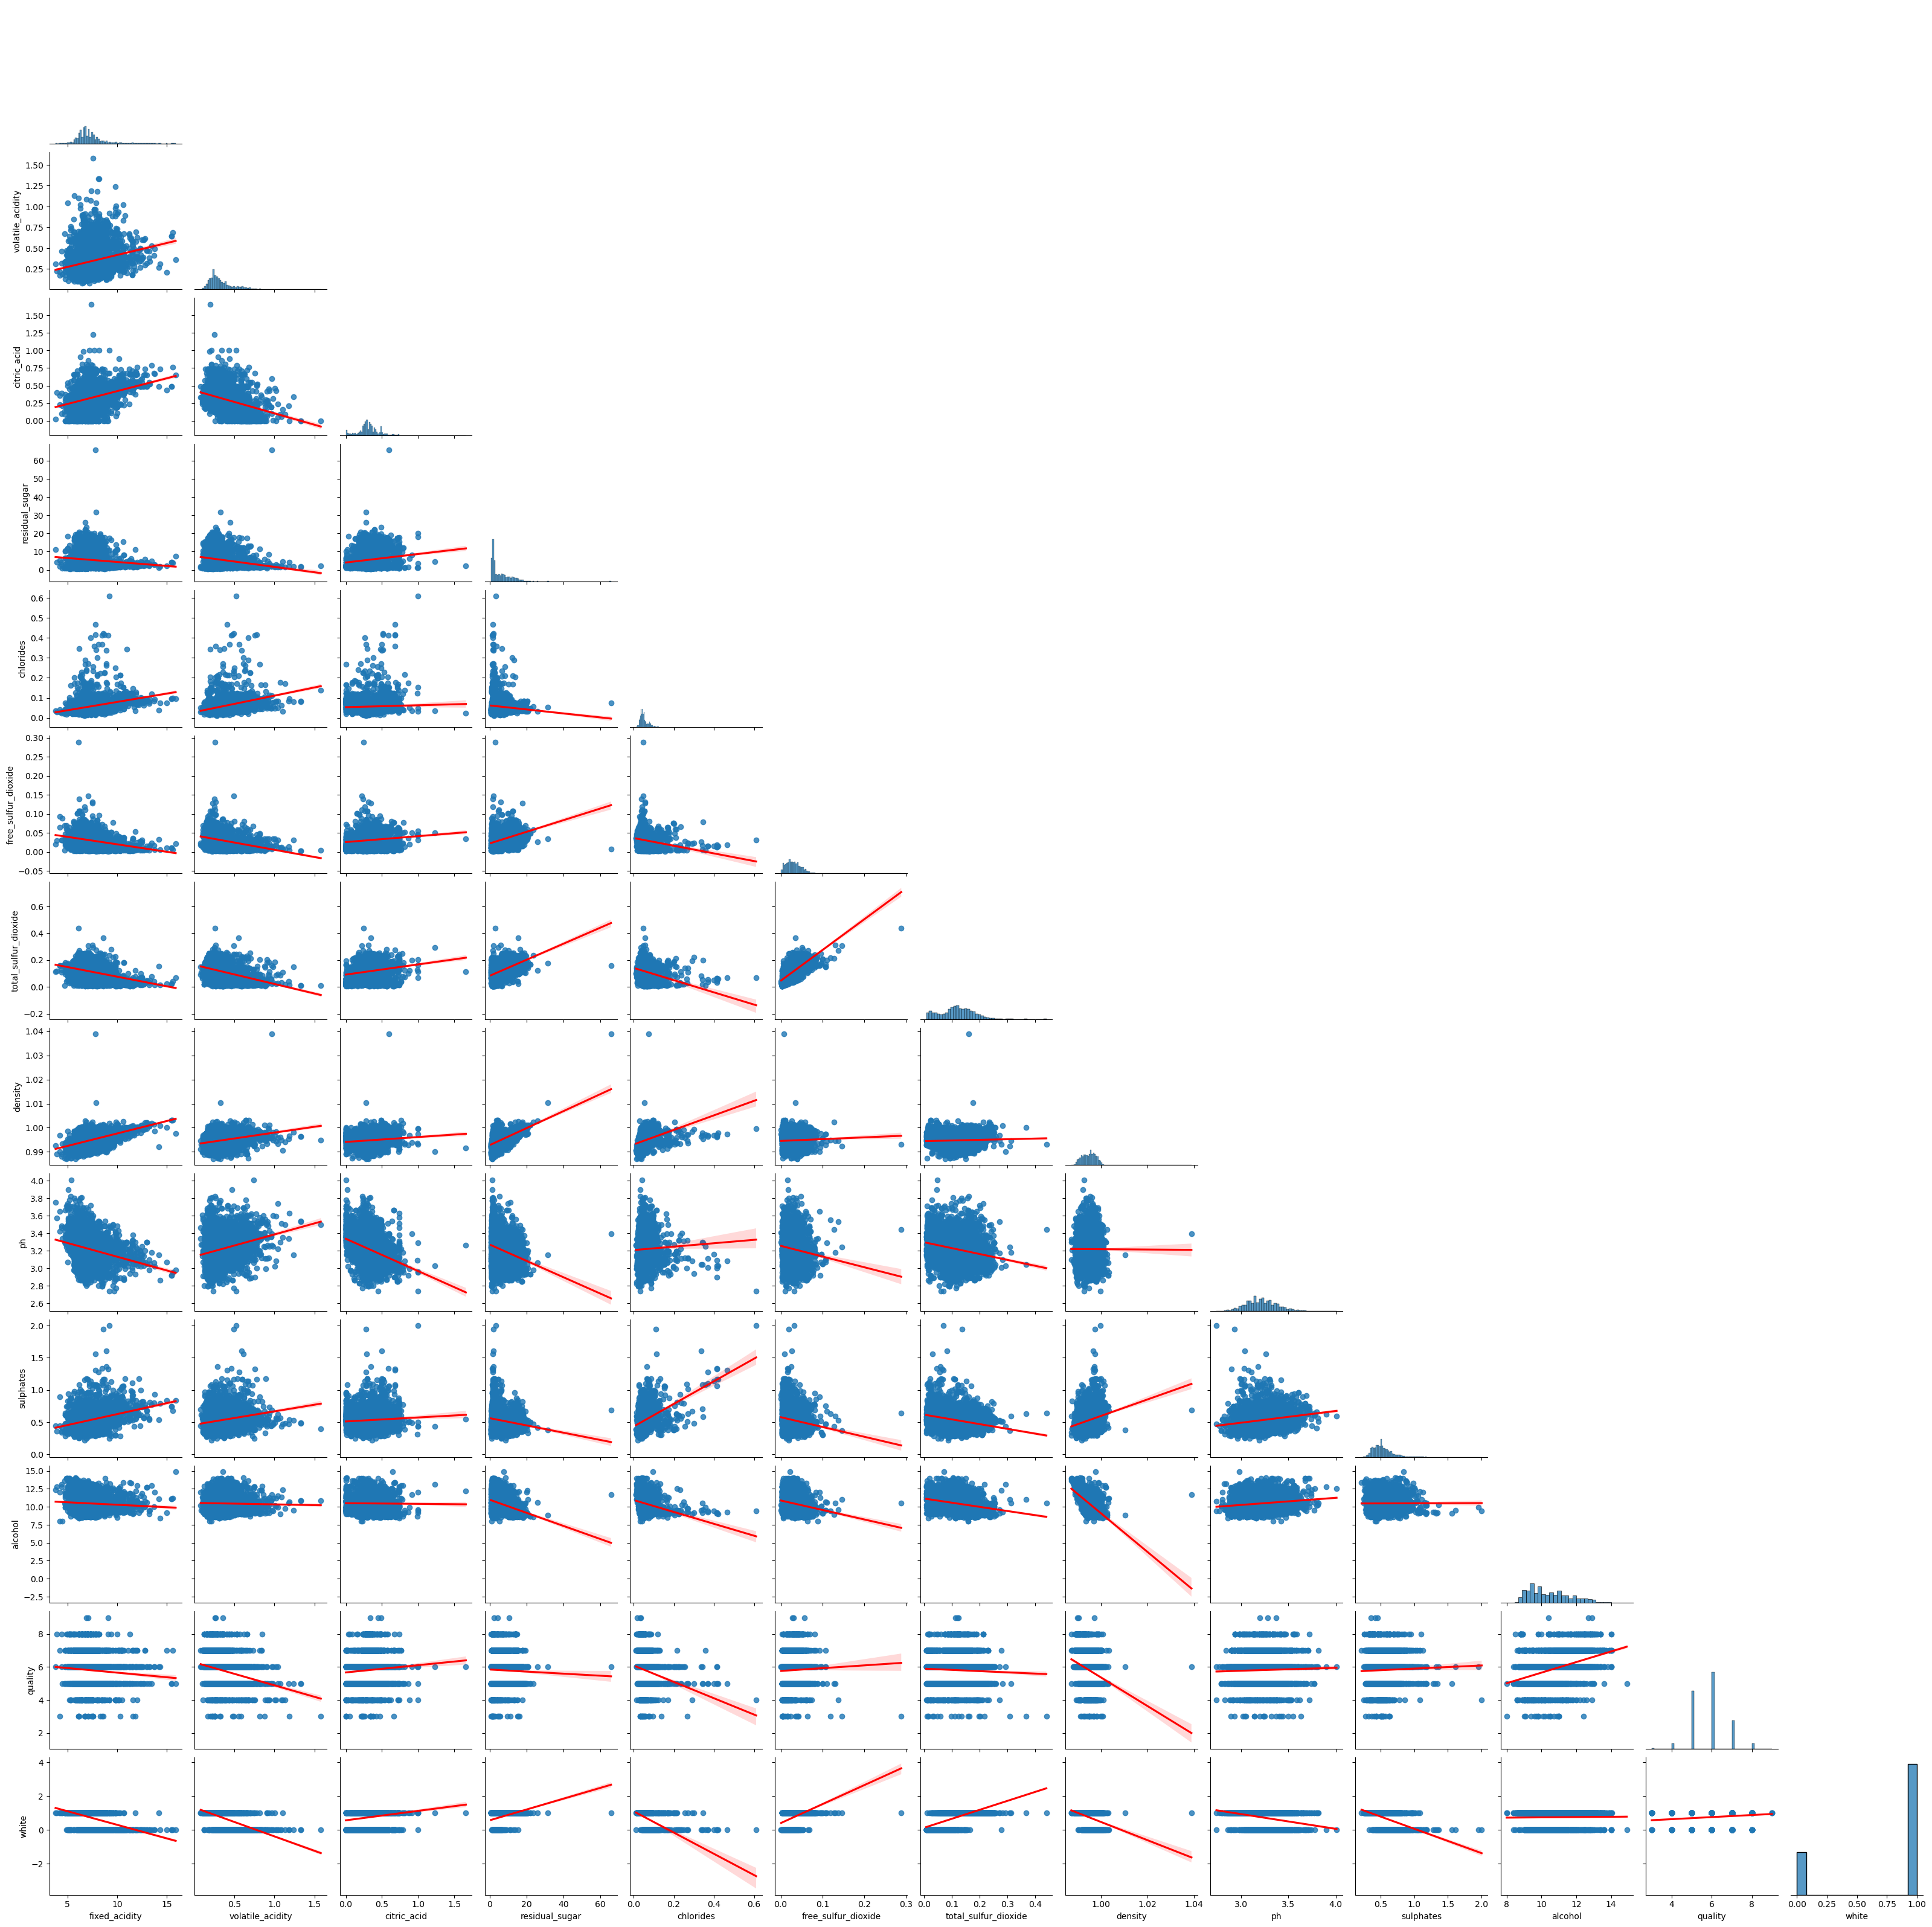

In [29]:
sns.pairplot(data=train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

In [17]:
def nulls_by_col(df):
    """
    This function will:
        - take in a dataframe
        - assign a variable to a Series of total row nulls for ea/column
        - assign a variable to find the percent of rows w/nulls
        - output a df of the two variables.
    """
    num_missing = df.isnull().sum()
    pct_miss = (num_missing / df.shape[0]) * 100
    cols_missing = pd.DataFrame({
                    'num_rows_missing': num_missing,
                    'percent_rows_missing': pct_miss
                    })
    
    return  cols_missing

In [18]:
def nulls_by_row(df):
    """
    """
    num_missing = df.isnull().sum(axis=1)
    pct_miss = (num_missing / df.shape[1]) * 100
    
    rows_missing = pd.DataFrame({
                    'num_cols_missing': num_missing,
                    'percent_cols_missing': pct_miss
                    })
    
    return rows_missing

In [19]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols

In [20]:
def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

In [21]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # .value_counts()
    # observation of nulls in the dataframe
    #distrinution of numerical attributes
    '''
    print(f"""SUMMARY REPORT
=====================================================
          
          
Dataframe head: 
{df.head()}
          
=====================================================
          
          
Dataframe info: """)
    df.info()

    print(f"""=====================================================
          
          
Dataframe Description: 
{df.describe().T}
          
=====================================================


nulls in dataframe by column: 
{nulls_by_col(df)}
=====================================================


nulls in dataframe by row: 
{nulls_by_row(df)}
=====================================================
    
    
DataFrame value counts: 
 """)         
    for col in (get_object_cols(df)): 
        print(f"""******** {col.upper()} - Value Counts:
{df[col].value_counts()}
    _______________________________________""")                   
        
# fig, axes = plt.subplots(1, len(get_numeric_cols(df)), figsize=(15, 5))
    
    for col in get_numeric_cols(df):
        sns.histplot(df[col])
        plt.title(f'Histogram of {col}')
        plt.show()  

SUMMARY REPORT
          
          
Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                0.011                 0.034   0.9978  3.51       0.56   
1                0.025                 0.067   0.9968  3.20       0.68   
2                0.015                 0.054   0.9970  3.26       0.65   
3                0.017                 0.060   0.9980  3.16       0.58   
4                0.011                 0.034   0.9978  3.51       0.56   

   alcohol  quality wine_type  w

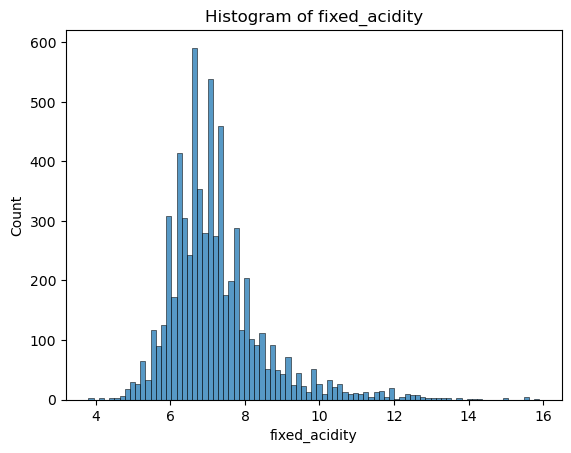

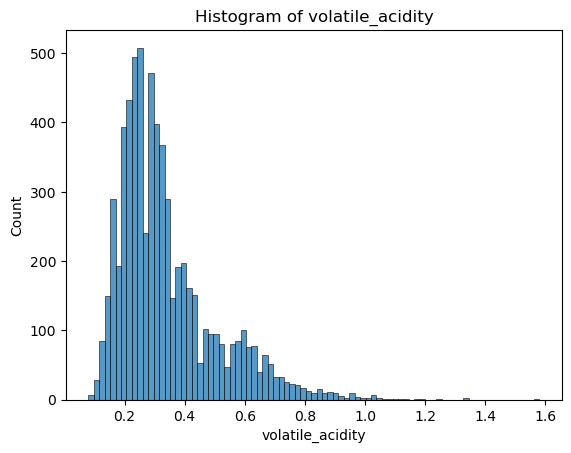

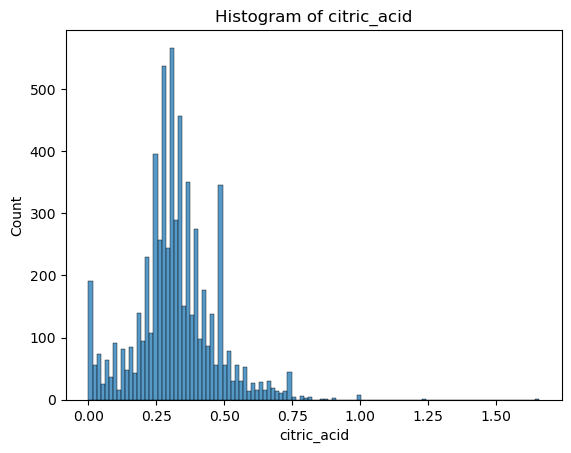

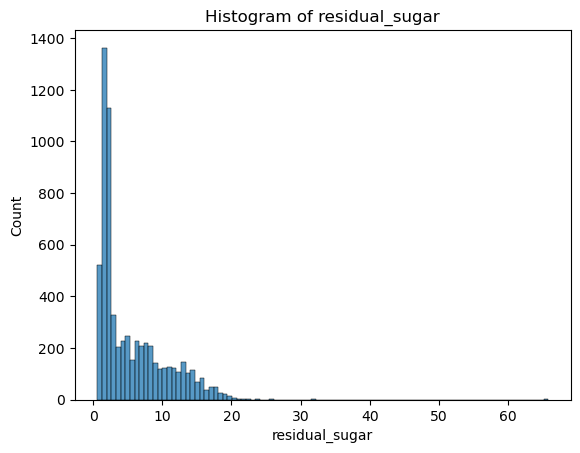

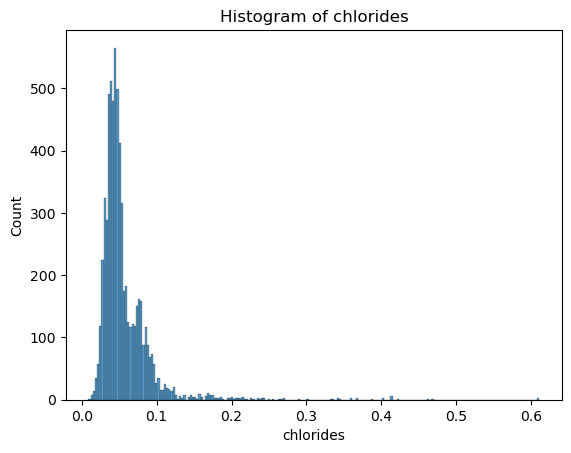

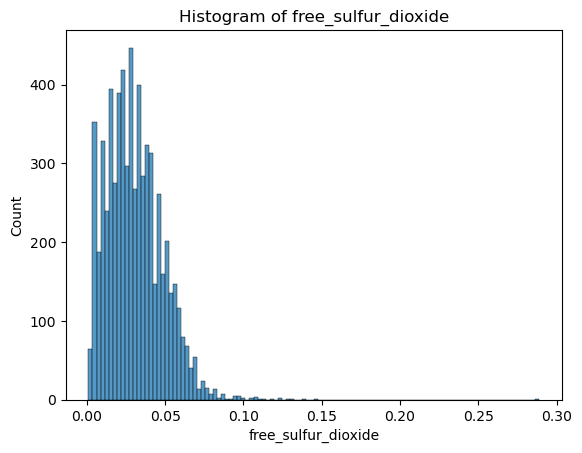

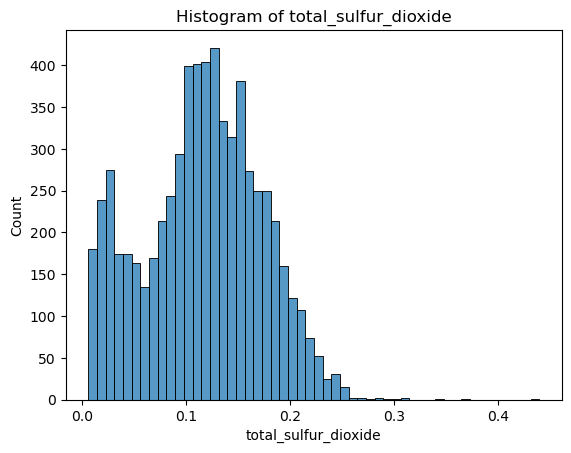

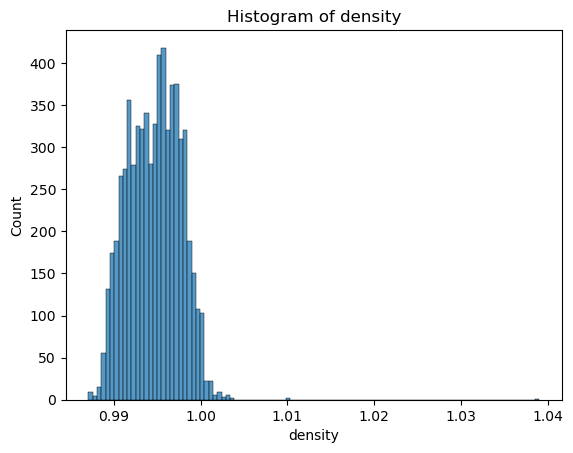

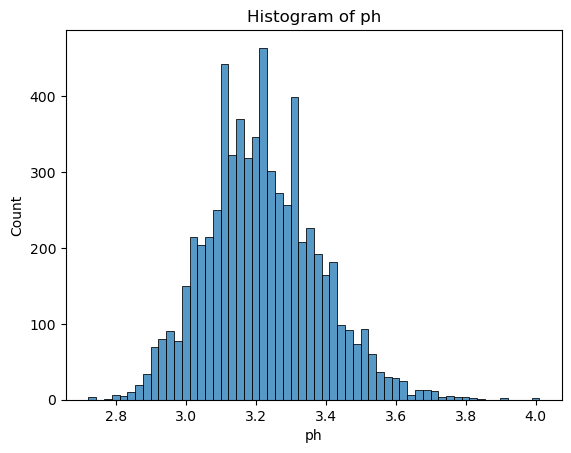

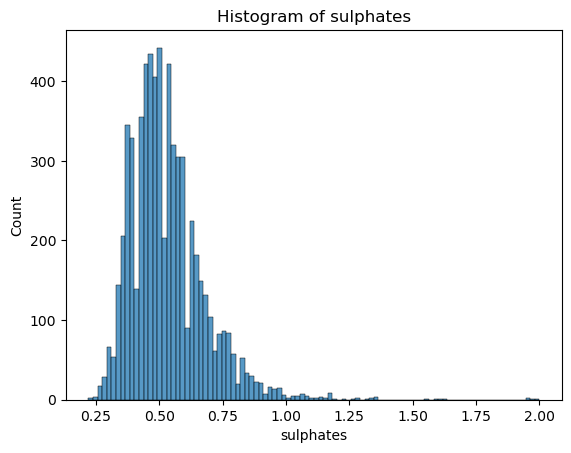

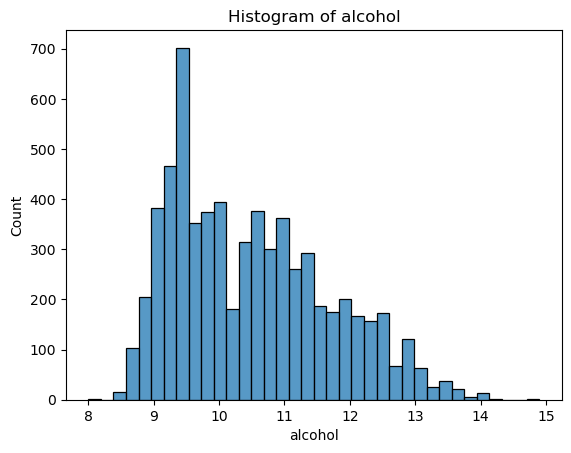

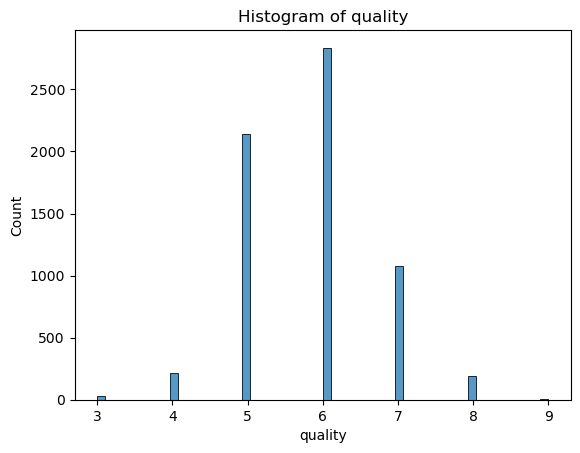

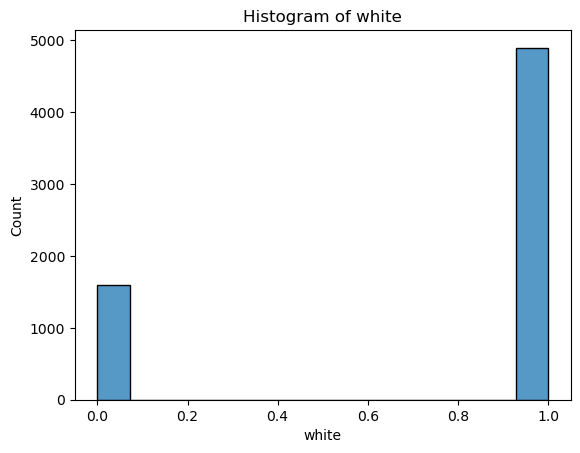

In [31]:
summarize(df)

# Variable is continuous and Target variable is category

Manny  
Are alcohol and quality correlated?  
Are volitile acidity and quality correlated?  

Scott  
Are sulphate and quality correlated?  
Are citric acid and quality correlated?  

Steps to take:  
Hypothesize  
Visualize  
Stats test  
Summarize  

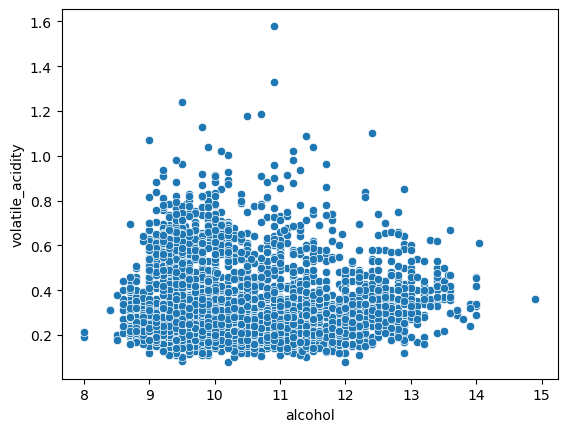

In [30]:
sns.scatterplot(data=train, x='alcohol', y='volatile_acidity')
plt.show()

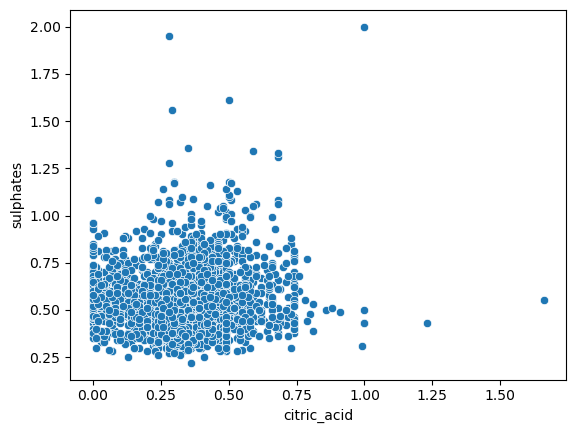

In [28]:
sns.scatterplot(data=train, x='citric_acid', y='sulphates')
plt.show()

In [17]:
X = train[['volatile_acidity', 'alcohol']]

In [28]:
#Initialize KMeans and fit it to the X subset:

# MAKE the thing
kmeans = KMeans(3)

#FIT the thing
kmeans.fit(X)

# USE the thing
kmeans.predict(X)

array([2, 1, 0, ..., 1, 1, 2], dtype=int32)

In [29]:
train['cluster'] = kmeans.predict(X)

In [30]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white,cluster
3353,6.4,0.16,0.28,2.2,0.042,0.033,0.093,0.99140,3.31,0.43,11.1,6,white,1,2
2032,7.2,0.55,0.09,1.5,0.108,0.016,0.151,0.99380,3.07,0.57,9.2,4,white,1,1
6223,6.4,0.40,0.25,4.2,0.032,0.015,0.091,0.98988,3.26,0.52,13.1,6,white,1,0


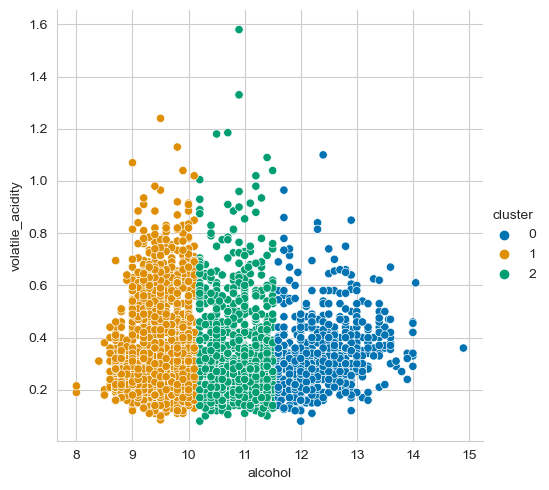

In [31]:
#Plot my predictions
sns.relplot(x='alcohol', y='volatile_acidity', hue='cluster', palette='colorblind', data=train)
plt.show()

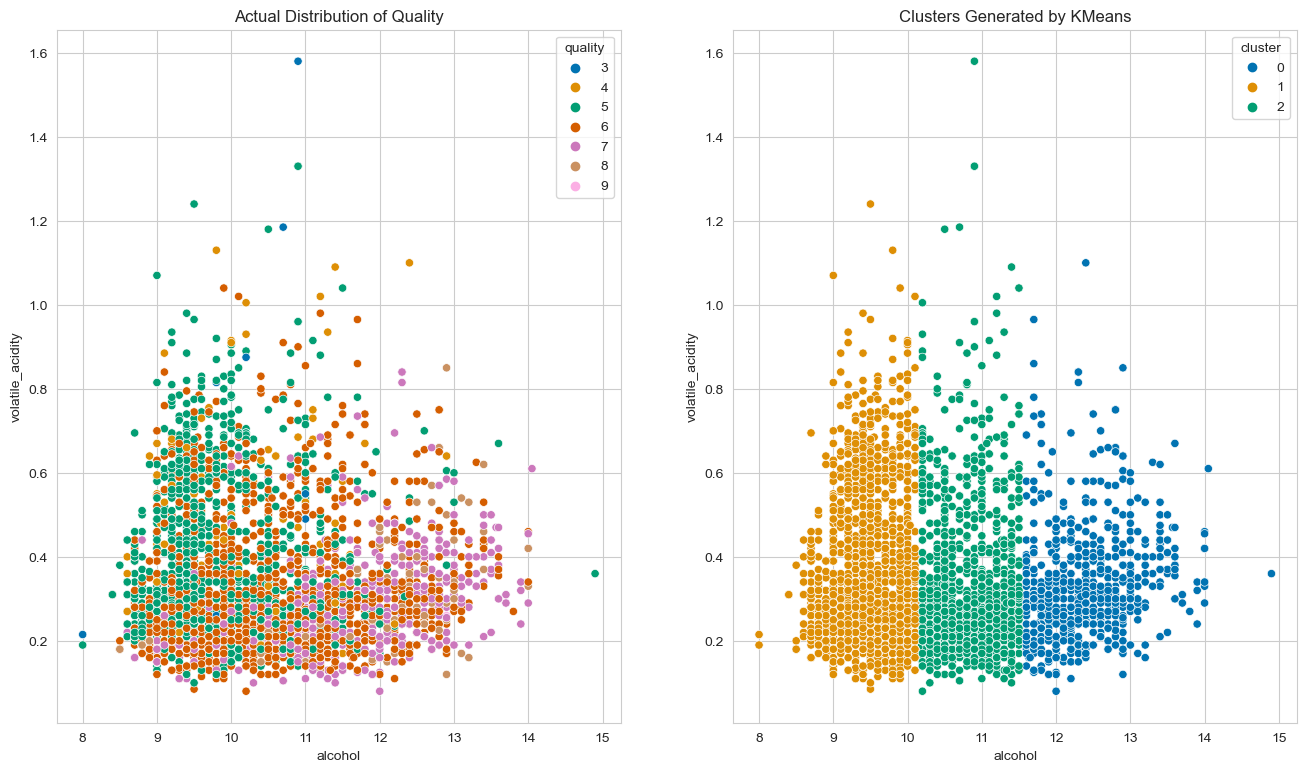

In [33]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='alcohol', y='volatile_acidity', hue='quality', palette='colorblind', data=train)
axes[0].set_title("Actual Distribution of Quality")

sns.scatterplot(ax=axes[1], x='alcohol', y='volatile_acidity', hue='cluster', palette='colorblind', data=train)
axes[1].set_title("Clusters Generated by KMeans")

plt.show()

In [20]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for k in range(2,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[1684.6843217124292,
 813.3564432606312,
 531.0466069104818,
 411.8054119658668,
 318.78975949747615,
 260.7700877616214,
 225.16220070645164,
 196.87097414606433,
 177.43610823389415]

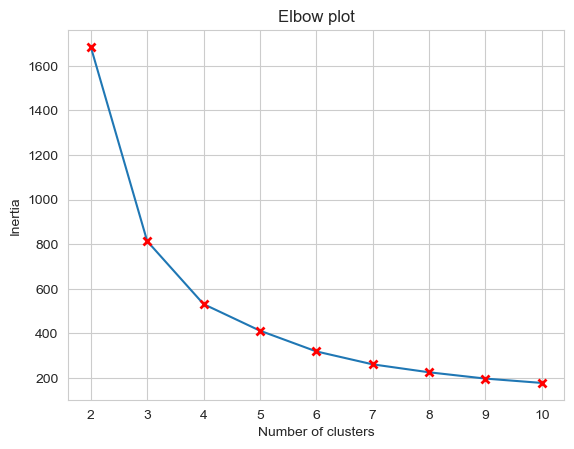

In [21]:
#Beautiful elbow graph
sns.set_style("whitegrid") # Set the grid style
sns.lineplot(x=range(2,11), y=inertia_list, marker="x", markeredgewidth=2, markeredgecolor="red")

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()

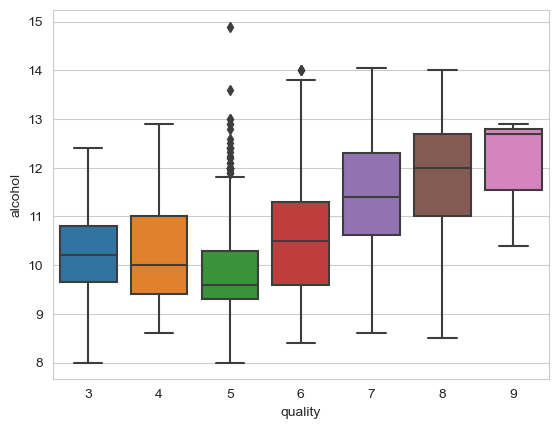

In [36]:
sns.boxplot(data=train, x='quality', y='alcohol')
plt.show()

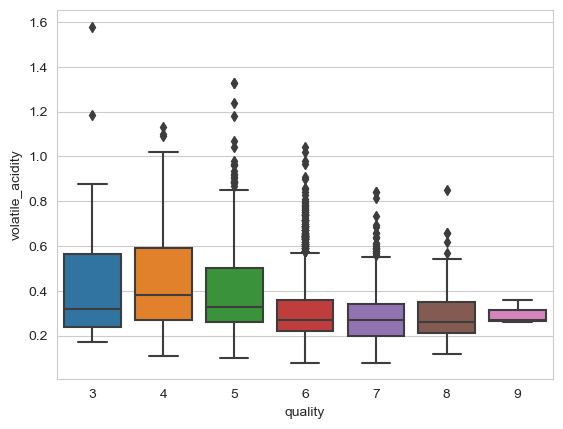

In [37]:
sns.boxplot(data=train, x='quality', y='volatile_acidity')
plt.show()

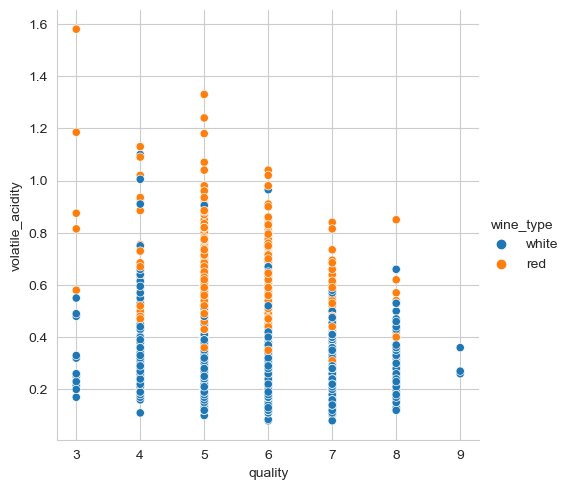

In [39]:
sns.relplot(data=train, x='quality', y='volatile_acidity', hue='wine_type')
plt.show()

In [40]:
X = train[['volatile_acidity', 'density']]

In [41]:
#Initialize KMeans and fit it to the X subset:

# MAKE the thing
kmeans = KMeans(3)

#FIT the thing
kmeans.fit(X)

# USE the thing
kmeans.predict(X)

array([1, 0, 2, ..., 2, 1, 2], dtype=int32)

In [42]:
train['cluster2'] = kmeans.predict(X)

In [43]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white,cluster,cluster2
3353,6.4,0.16,0.28,2.2,0.042,0.033,0.093,0.99140,3.31,0.43,11.1,6,white,1,2,1
2032,7.2,0.55,0.09,1.5,0.108,0.016,0.151,0.99380,3.07,0.57,9.2,4,white,1,1,0
6223,6.4,0.40,0.25,4.2,0.032,0.015,0.091,0.98988,3.26,0.52,13.1,6,white,1,0,2


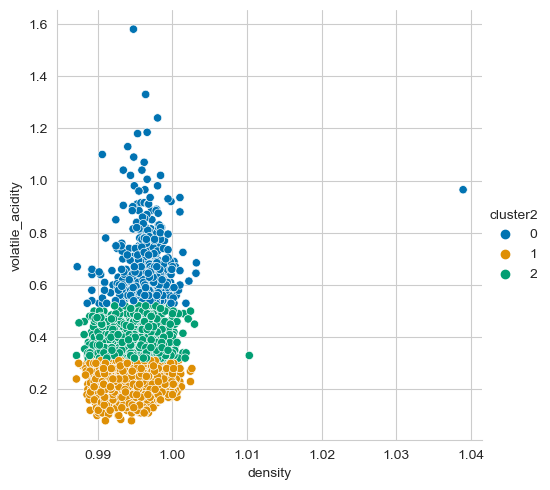

In [45]:
#Plot my predictions
sns.relplot(x='density', y='volatile_acidity', hue='cluster2', palette='colorblind', data=train)
plt.show()

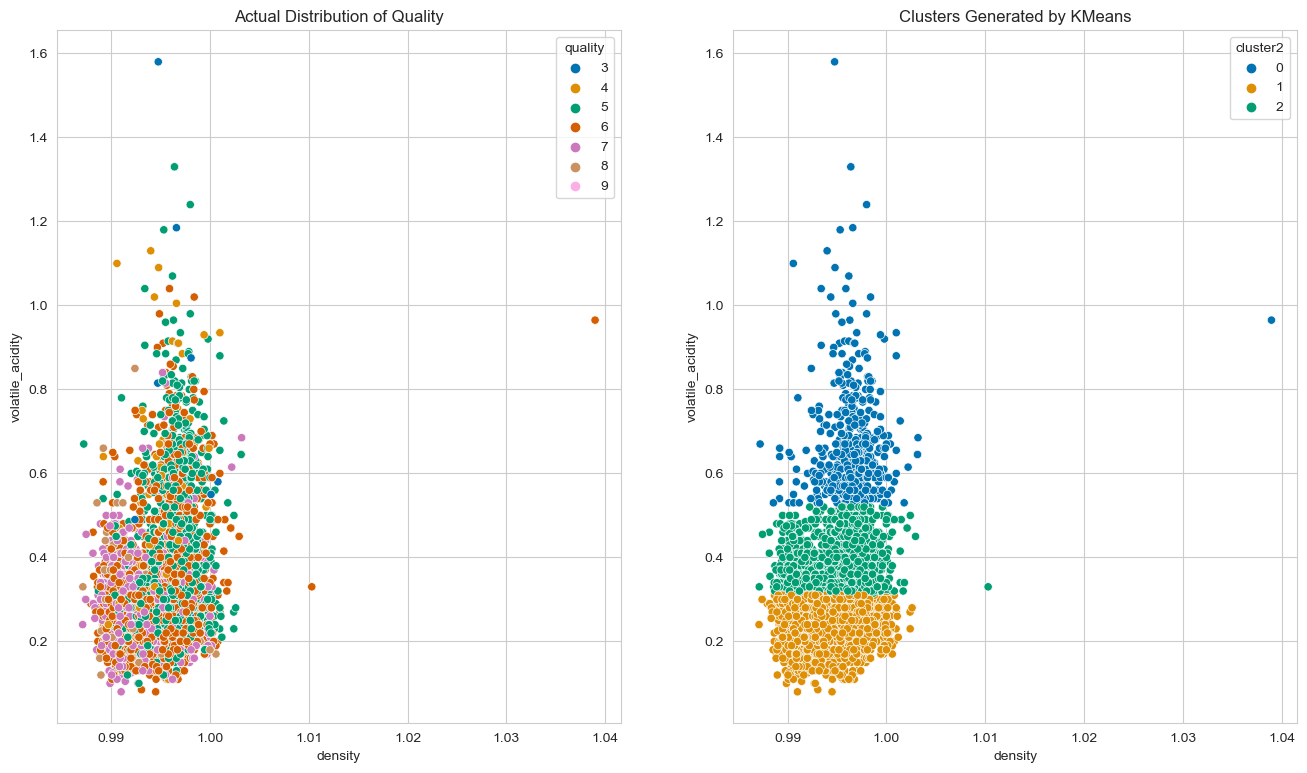

In [47]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='density', y='volatile_acidity', hue='quality', palette='colorblind', data=train)
axes[0].set_title("Actual Distribution of Quality")

sns.scatterplot(ax=axes[1], x='density', y='volatile_acidity', hue='cluster2', palette='colorblind', data=train)
axes[1].set_title("Clusters Generated by KMeans")

plt.show()

In [48]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for k in range(2,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[32.91000582658457,
 18.24614214320671,
 11.9014156475453,
 7.834438906186074,
 5.909300272632789,
 4.385170408547259,
 3.4769632455924295,
 2.811149777474337,
 2.282876913966593]

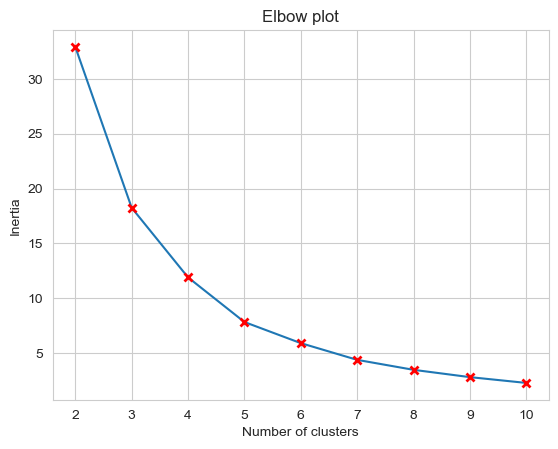

In [49]:
#Beautiful elbow graph
sns.set_style("whitegrid") # Set the grid style
sns.lineplot(x=range(2,11), y=inertia_list, marker="x", markeredgewidth=2, markeredgecolor="red")

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()

In [50]:
X = train[['volatile_acidity', 'fixed_acidity']]

In [65]:
#Initialize KMeans and fit it to the X subset:

# MAKE the thing
kmeans = KMeans(3)

#FIT the thing
kmeans.fit(X)

# USE the thing
kmeans.predict(X)

array([0, 2, 0, ..., 2, 2, 1], dtype=int32)

In [66]:
train['cluster3'] = kmeans.predict(X)

In [67]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white,cluster,cluster2,cluster3
3353,6.4,0.16,0.28,2.2,0.042,0.033,0.093,0.99140,3.31,0.43,11.1,6,white,1,2,1,0
2032,7.2,0.55,0.09,1.5,0.108,0.016,0.151,0.99380,3.07,0.57,9.2,4,white,1,1,0,2
6223,6.4,0.40,0.25,4.2,0.032,0.015,0.091,0.98988,3.26,0.52,13.1,6,white,1,0,2,0


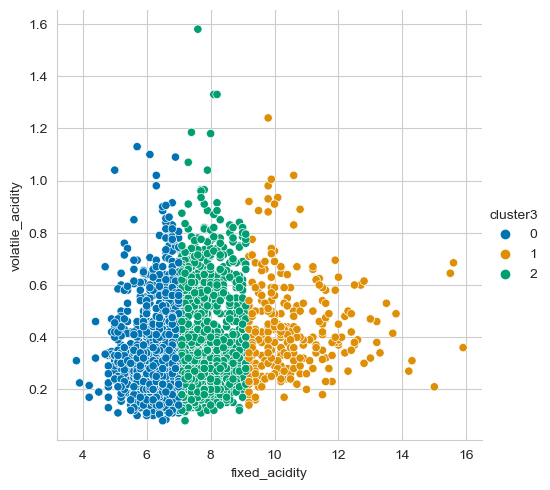

In [68]:
#Plot my predictions
sns.relplot(x='fixed_acidity', y='volatile_acidity', hue='cluster3', palette='colorblind', data=train)
plt.show()

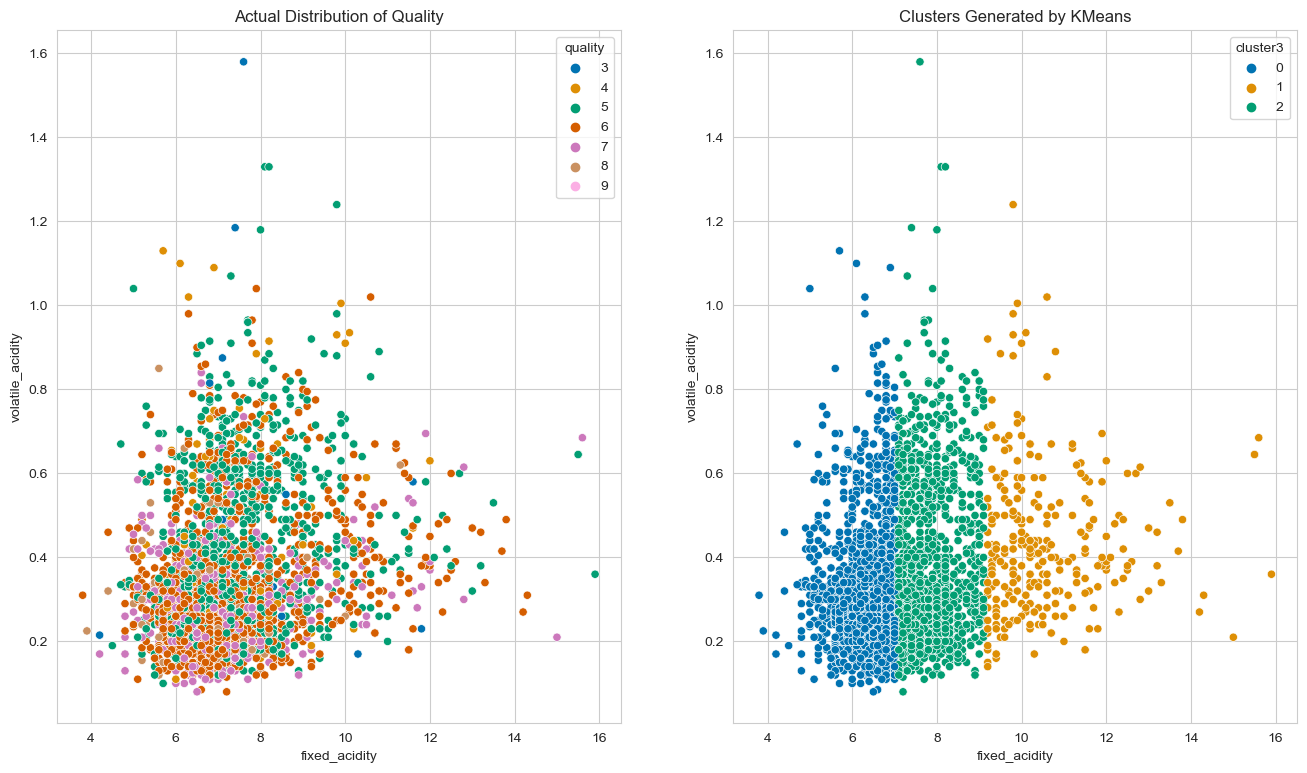

In [69]:
#Plot the actual distribution of species next to my generated clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='fixed_acidity', y='volatile_acidity', hue='quality', palette='colorblind', data=train)
axes[0].set_title("Actual Distribution of Quality")

sns.scatterplot(ax=axes[1], x='fixed_acidity', y='volatile_acidity', hue='cluster3', palette='colorblind', data=train)
axes[1].set_title("Clusters Generated by KMeans")

plt.show()

In [70]:
#Fill a list with inertia values for increasing number of clusters
inertia_list = []

for k in range(2,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[2788.5445663326554,
 1535.0701920136419,
 1000.866422076702,
 722.7349653572911,
 548.4242638187156,
 443.8464896716248,
 372.56555642543094,
 306.8953318695979,
 269.6480261124014]

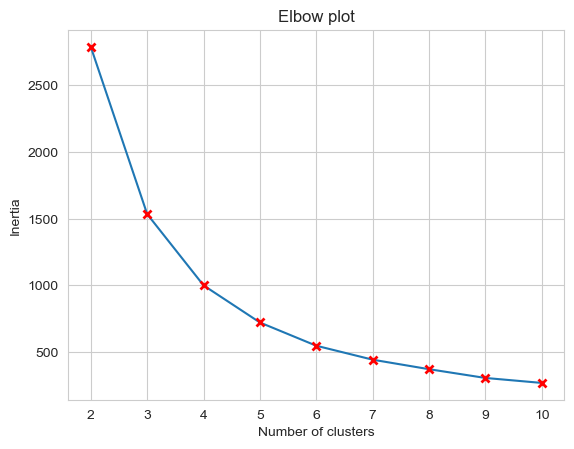

In [71]:
#Beautiful elbow graph
sns.set_style("whitegrid") # Set the grid style
sns.lineplot(x=range(2,11), y=inertia_list, marker="x", markeredgewidth=2, markeredgecolor="red")

plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.show()